In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
X = 6 * np.random.rand(100, 1) - 3
y = 0.5 * X**2 + 1.5*X + 2 + np.random.randn(100, 1)

Text(0, 0.5, 'y-axis')

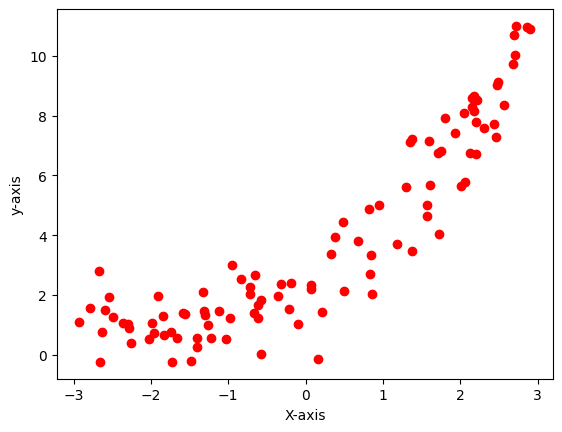

In [3]:
## Plotting the generated values
plt.scatter(X, y, color='red')
plt.xlabel("X-axis")
plt.ylabel("y-axis")

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
## Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [6]:
# Linear regression
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()

In [7]:
linear_regression.fit(X_train,y_train)

LinearRegression()

In [8]:
from sklearn.metrics import r2_score

In [9]:
lin_score = r2_score(y_test,linear_regression.predict(X_test))
lin_score

0.7976964729411454

Text(0, 0.5, 'Y-axis')

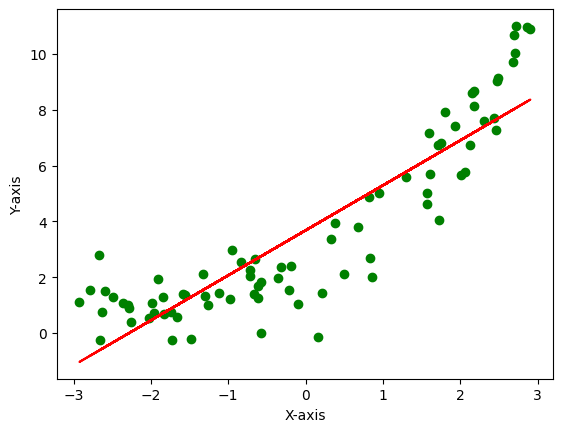

In [10]:
#Visualization
plt.plot(X_train,linear_regression.predict(X_train),color="red")
plt.scatter(X_train,y_train,color="green")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")

In [11]:
# Polynomial transformation
from sklearn.preprocessing import PolynomialFeatures

In [12]:
# Degree = 2
poly_fet=PolynomialFeatures(degree=2,include_bias=True)

In [13]:
X_train_poly=poly_fet.fit_transform(X_train)
X_test_poly=poly_fet.transform(X_test)

In [14]:
# Polynomial Regression
linear_regression_poly = LinearRegression()
linear_regression_poly.fit(X_train_poly,y_train)

LinearRegression()

In [15]:
lin_score = r2_score(y_test,linear_regression_poly.predict(X_test_poly))
lin_score

0.8926044699638969

In [16]:
linear_regression_poly.coef_

array([[0.        , 1.54243548, 0.45590881]])

In [17]:
linear_regression_poly.intercept_

array([2.21654796])

Text(0, 0.5, 'Y-axis')

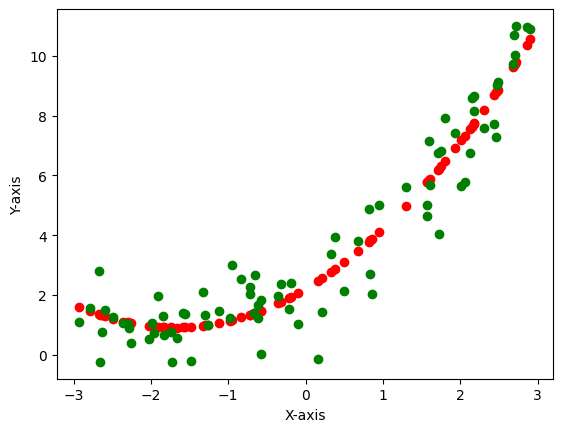

In [18]:
#Visualization
plt.scatter(X_train,linear_regression_poly.predict(X_train_poly),color="red")
plt.scatter(X_train,y_train,color="green")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")

In [19]:
# Degree = 3
poly_fet=PolynomialFeatures(degree=3,include_bias=True)

In [20]:
X_train_poly=poly_fet.fit_transform(X_train)
X_test_poly=poly_fet.transform(X_test)

In [21]:
# Polynomial Regression
linear_regression_poly = LinearRegression()
linear_regression_poly.fit(X_train_poly,y_train)

LinearRegression()

In [22]:
lin_score = r2_score(y_test,linear_regression_poly.predict(X_test_poly))
lin_score

0.8768738998673691

Text(0, 0.5, 'Y-axis')

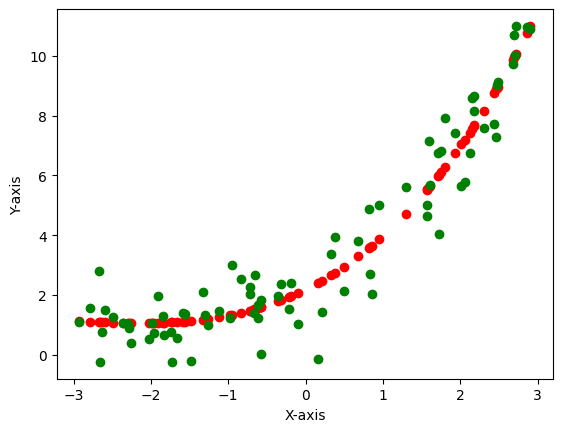

In [23]:
#Visualization
plt.scatter(X_train,linear_regression_poly.predict(X_train_poly),color="red")
plt.scatter(X_train,y_train,color="green")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")

In [24]:
# Prediction for new data set
X_new = np.linspace(-3, 3, 100).reshape(100, 1)

In [25]:
X_new_poly = poly_fet.transform(X_new)

In [26]:
y_new = linear_regression_poly.predict(X_new_poly)

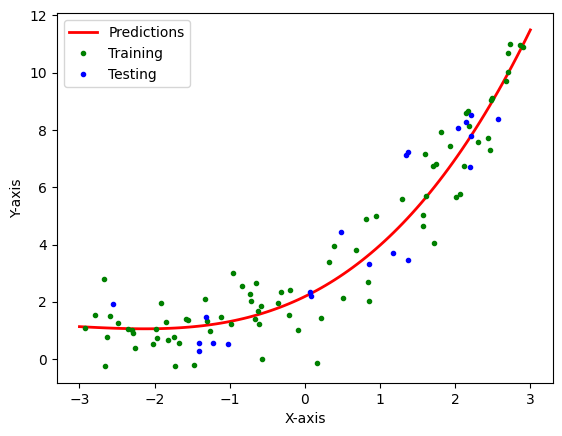

In [27]:
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(X_train, y_train, "g.",label="Training")
plt.plot(X_test, y_test, "b.",label="Testing")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend(loc="best")

### Pipeline Concepts

In [28]:
from sklearn.pipeline import Pipeline

In [33]:
def polynomial_regression(degree):
  X_new = np.linspace(-3, 3, 100).reshape(100, 1)
  poly_features = PolynomialFeatures(degree=degree,include_bias=True)
  lin_reg = LinearRegression()
  poly_reg = Pipeline([
      ("poly_features",poly_features),
      ("lin_reg",lin_reg)
  ])
  poly_reg.fit(X_train,y_train)
  y_pred_new = poly_reg.predict(X_new)
  ## Plotting the prediction line
  plt.plot(X_new, y_pred_new, "r-", linewidth=2, label="Predictions with degree" + str(degree))
  plt.plot(X_train, y_train, "g.",label="Training")
  plt.plot(X_test, y_test, "b.",label="Testing")
  plt.xlabel("X-axis")
  plt.ylabel("Y-axis")
  plt.legend(loc="best")

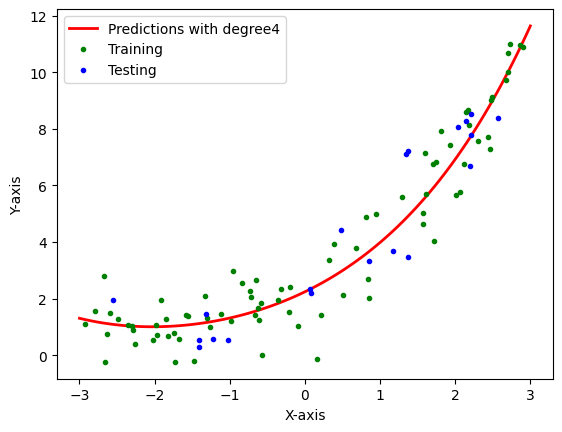

In [34]:
polynomial_regression(degree=4)

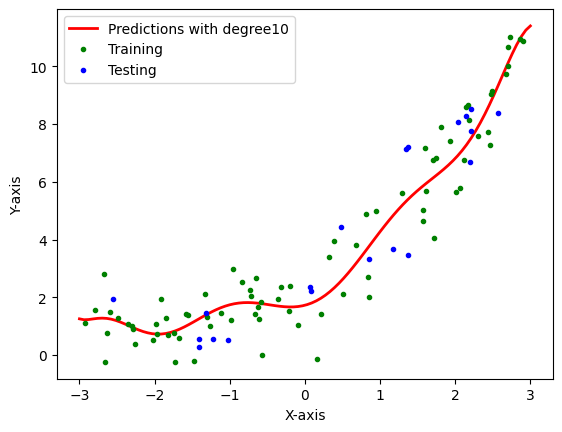

In [35]:
polynomial_regression(degree=10)